In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join("..")))
print(os.path.abspath(os.path.join("..")))

/media/edint/64d115f7-57cc-417b-acf0-7738ac091615/Ivern/WorkSpace/CNN


In [2]:
from dataset import download_dataset

loader_dict = download_dataset()
train_loader = loader_dict["train"]
test_loader = loader_dict["test"]


# CIFAR-10 클래스 이름
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# 테스트셋에서 일부 샘플 가져오기
dataiter = iter(test_loader)
images, labels = next(dataiter)

In [3]:
from mobilenet.mobilenet_4 import MobileNetV4ConvMedium

import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device : {device}")
model = MobileNetV4ConvMedium(num_classes=10).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Device : cuda


/home/edint/Ivern/WorkSpace/CNN/venv/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [4]:
from tqdm import tqdm
print('Start Training...')
epochs = 100

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(epochs):
    # ---- Training ----
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch}/{epochs}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100. * correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    print(
        f"[Epoch {epoch+1}] Train Loss: {running_loss/len(train_loader):.4f} | Train Acc: {train_acc:.2f}%"
    )

    # ---- Validation ----
    model.eval()
    correct, total = 0, 0
    val_loss_sum = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss_sum  += criterion(outputs, labels).item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss = val_loss_sum / len(test_loader)
    val_acc = 100. * correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(
        f"           Val Loss: {val_loss/len(test_loader):.4f} | Val Acc: {val_acc:.2f}%\n"
    )
    torch.save(model.state_dict(), "mobilenetv4_medium_cifar10.pth")

Start Training...


Epoch 0/100: 100%|██████████| 782/782 [01:38<00:00,  7.96it/s]

[Epoch 1] Train Loss: 1.9424 | Train Acc: 21.98%


           Val Loss: 0.0117 | Val Acc: 26.48%



Epoch 1/100: 100%|██████████| 782/782 [01:36<00:00,  8.09it/s]

[Epoch 2] Train Loss: 1.7788 | Train Acc: 29.75%


           Val Loss: 0.0123 | Val Acc: 25.86%



Epoch 2/100: 100%|██████████| 782/782 [01:36<00:00,  8.09it/s]

[Epoch 3] Train Loss: 1.8534 | Train Acc: 28.50%


           Val Loss: 0.0118 | Val Acc: 27.77%



Epoch 3/100: 100%|██████████| 782/782 [01:36<00:00,  8.07it/s]

[Epoch 4] Train Loss: 1.5876 | Train Acc: 36.75%


           Val Loss: 0.0088 | Val Acc: 45.68%



Epoch 4/100: 100%|██████████| 782/782 [01:36<00:00,  8.08it/s]

[Epoch 5] Train Loss: 1.3144 | Train Acc: 50.80%


           Val Loss: 0.0085 | Val Acc: 49.51%



Epoch 5/100: 100%|██████████| 782/782 [01:36<00:00,  8.07it/s]

[Epoch 6] Train Loss: 1.1496 | Train Acc: 58.19%


           Val Loss: 0.0068 | Val Acc: 61.94%



Epoch 6/100: 100%|██████████| 782/782 [01:36<00:00,  8.07it/s]


[Epoch 7] Train Loss: 1.0226 | Train Acc: 63.82%
           Val Loss: 0.0064 | Val Acc: 66.00%



Epoch 7/100: 100%|██████████| 782/782 [01:36<00:00,  8.07it/s]


[Epoch 8] Train Loss: 0.9371 | Train Acc: 67.78%
           Val Loss: 0.0055 | Val Acc: 70.52%



Epoch 8/100: 100%|██████████| 782/782 [01:36<00:00,  8.07it/s]

[Epoch 9] Train Loss: 0.8415 | Train Acc: 71.90%


           Val Loss: 0.0049 | Val Acc: 74.85%



Epoch 9/100: 100%|██████████| 782/782 [01:50<00:00,  7.07it/s]

[Epoch 10] Train Loss: 0.7862 | Train Acc: 74.41%


           Val Loss: 0.0050 | Val Acc: 75.35%



Epoch 10/100: 100%|██████████| 782/782 [02:03<00:00,  6.31it/s]

[Epoch 11] Train Loss: 0.7452 | Train Acc: 76.46%


           Val Loss: 0.0046 | Val Acc: 77.20%



Epoch 11/100: 100%|██████████| 782/782 [03:06<00:00,  4.18it/s]

[Epoch 12] Train Loss: 0.6993 | Train Acc: 78.17%


           Val Loss: 0.0044 | Val Acc: 78.66%



Epoch 12/100: 100%|██████████| 782/782 [03:10<00:00,  4.11it/s]

[Epoch 13] Train Loss: 0.6831 | Train Acc: 78.64%


           Val Loss: 0.0044 | Val Acc: 77.28%



Epoch 13/100: 100%|██████████| 782/782 [03:10<00:00,  4.11it/s]

[Epoch 14] Train Loss: 0.6142 | Train Acc: 80.86%


           Val Loss: 0.0042 | Val Acc: 79.36%



Epoch 14/100: 100%|██████████| 782/782 [03:09<00:00,  4.13it/s]

[Epoch 15] Train Loss: 0.7014 | Train Acc: 77.93%


           Val Loss: 0.0043 | Val Acc: 79.11%



Epoch 15/100: 100%|██████████| 782/782 [03:09<00:00,  4.14it/s]

[Epoch 16] Train Loss: 0.7105 | Train Acc: 77.63%


           Val Loss: 0.0047 | Val Acc: 76.07%



Epoch 16/100: 100%|██████████| 782/782 [03:20<00:00,  3.89it/s]

[Epoch 17] Train Loss: 0.7478 | Train Acc: 76.55%


           Val Loss: 0.0057 | Val Acc: 72.03%



Epoch 17/100: 100%|██████████| 782/782 [03:19<00:00,  3.92it/s]

[Epoch 18] Train Loss: 1.0023 | Train Acc: 67.55%


           Val Loss: 0.0055 | Val Acc: 72.04%



Epoch 18/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 19] Train Loss: 1.1259 | Train Acc: 62.07%


           Val Loss: 0.0091 | Val Acc: 50.23%



Epoch 19/100: 100%|██████████| 782/782 [03:15<00:00,  3.99it/s]

[Epoch 20] Train Loss: 1.6476 | Train Acc: 40.43%


           Val Loss: 0.0099 | Val Acc: 44.82%



Epoch 20/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 21] Train Loss: 1.6214 | Train Acc: 41.67%


           Val Loss: 0.0098 | Val Acc: 44.48%



Epoch 21/100: 100%|██████████| 782/782 [03:20<00:00,  3.89it/s]

[Epoch 22] Train Loss: 1.5472 | Train Acc: 45.20%


           Val Loss: 0.0099 | Val Acc: 44.01%



Epoch 22/100: 100%|██████████| 782/782 [03:16<00:00,  3.98it/s]

[Epoch 23] Train Loss: 1.4321 | Train Acc: 49.24%


           Val Loss: 0.0085 | Val Acc: 53.62%



Epoch 23/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 24] Train Loss: 1.3327 | Train Acc: 53.05%


           Val Loss: 0.0078 | Val Acc: 56.41%



Epoch 24/100: 100%|██████████| 782/782 [03:18<00:00,  3.95it/s]

[Epoch 25] Train Loss: 1.1995 | Train Acc: 58.84%


           Val Loss: 0.0084 | Val Acc: 56.33%



Epoch 25/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 26] Train Loss: 1.1459 | Train Acc: 60.99%


           Val Loss: 0.0063 | Val Acc: 66.70%



Epoch 26/100: 100%|██████████| 782/782 [03:20<00:00,  3.90it/s]

[Epoch 27] Train Loss: 1.0796 | Train Acc: 64.49%


           Val Loss: 0.0064 | Val Acc: 67.47%



Epoch 27/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 28] Train Loss: 0.9109 | Train Acc: 70.52%


           Val Loss: 0.0051 | Val Acc: 74.57%



Epoch 28/100: 100%|██████████| 782/782 [03:18<00:00,  3.95it/s]

[Epoch 29] Train Loss: 1.0620 | Train Acc: 64.91%


           Val Loss: 0.0078 | Val Acc: 57.35%



Epoch 29/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 30] Train Loss: 1.0278 | Train Acc: 65.41%


           Val Loss: 0.0057 | Val Acc: 70.36%



Epoch 30/100: 100%|██████████| 782/782 [03:15<00:00,  3.99it/s]

[Epoch 31] Train Loss: 0.9058 | Train Acc: 70.35%


           Val Loss: 0.0056 | Val Acc: 71.29%



Epoch 31/100: 100%|██████████| 782/782 [03:20<00:00,  3.90it/s]

[Epoch 32] Train Loss: 0.8886 | Train Acc: 71.20%


           Val Loss: 0.0055 | Val Acc: 72.11%



Epoch 32/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 33] Train Loss: 0.8678 | Train Acc: 71.90%


           Val Loss: 0.0052 | Val Acc: 73.72%



Epoch 33/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 34] Train Loss: 0.9976 | Train Acc: 67.72%


           Val Loss: 0.0066 | Val Acc: 66.74%



Epoch 34/100: 100%|██████████| 782/782 [03:15<00:00,  3.99it/s]

[Epoch 35] Train Loss: 1.0234 | Train Acc: 67.18%


           Val Loss: 0.0080 | Val Acc: 59.16%



Epoch 35/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 36] Train Loss: 0.9661 | Train Acc: 68.35%


           Val Loss: 0.0066 | Val Acc: 66.08%



Epoch 36/100: 100%|██████████| 782/782 [03:20<00:00,  3.89it/s]

[Epoch 37] Train Loss: 0.9335 | Train Acc: 69.87%


           Val Loss: 0.0059 | Val Acc: 70.63%



Epoch 37/100: 100%|██████████| 782/782 [03:18<00:00,  3.95it/s]

[Epoch 38] Train Loss: 1.0647 | Train Acc: 65.35%


           Val Loss: 0.0058 | Val Acc: 70.40%



Epoch 38/100: 100%|██████████| 782/782 [03:17<00:00,  3.95it/s]

[Epoch 39] Train Loss: 1.0603 | Train Acc: 65.40%


           Val Loss: 0.0130 | Val Acc: 30.37%



Epoch 39/100: 100%|██████████| 782/782 [03:18<00:00,  3.95it/s]

[Epoch 40] Train Loss: 1.5801 | Train Acc: 44.33%


           Val Loss: 0.0095 | Val Acc: 46.76%



Epoch 40/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 41] Train Loss: 1.5274 | Train Acc: 45.40%


           Val Loss: 0.0110 | Val Acc: 37.38%



Epoch 41/100: 100%|██████████| 782/782 [03:20<00:00,  3.90it/s]

[Epoch 42] Train Loss: 1.5048 | Train Acc: 46.13%


           Val Loss: 0.0089 | Val Acc: 51.11%



Epoch 42/100: 100%|██████████| 782/782 [03:18<00:00,  3.95it/s]

[Epoch 43] Train Loss: 1.4746 | Train Acc: 48.07%


           Val Loss: 0.0085 | Val Acc: 53.43%



Epoch 43/100: 100%|██████████| 782/782 [03:18<00:00,  3.95it/s]

[Epoch 44] Train Loss: 1.2689 | Train Acc: 55.45%


           Val Loss: 0.0070 | Val Acc: 61.86%



Epoch 44/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 45] Train Loss: 1.0918 | Train Acc: 62.46%


           Val Loss: 0.0068 | Val Acc: 64.44%



Epoch 45/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 46] Train Loss: 0.9839 | Train Acc: 66.44%


           Val Loss: 0.0061 | Val Acc: 67.16%



Epoch 46/100: 100%|██████████| 782/782 [03:20<00:00,  3.89it/s]

[Epoch 47] Train Loss: 0.8743 | Train Acc: 70.42%


           Val Loss: 0.0058 | Val Acc: 70.71%



Epoch 47/100: 100%|██████████| 782/782 [03:17<00:00,  3.95it/s]

[Epoch 48] Train Loss: 1.0210 | Train Acc: 65.55%


           Val Loss: 0.0073 | Val Acc: 61.40%



Epoch 48/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 49] Train Loss: 0.9854 | Train Acc: 66.65%


           Val Loss: 0.0081 | Val Acc: 60.18%



Epoch 49/100: 100%|██████████| 782/782 [03:15<00:00,  3.99it/s]

[Epoch 50] Train Loss: 1.1158 | Train Acc: 62.01%


           Val Loss: 0.0081 | Val Acc: 55.98%



Epoch 50/100: 100%|██████████| 782/782 [03:18<00:00,  3.95it/s]

[Epoch 51] Train Loss: 1.1772 | Train Acc: 59.51%


           Val Loss: 0.0088 | Val Acc: 53.36%



Epoch 51/100: 100%|██████████| 782/782 [03:20<00:00,  3.89it/s]

[Epoch 52] Train Loss: 1.2635 | Train Acc: 56.56%


           Val Loss: 0.0084 | Val Acc: 54.75%



Epoch 52/100: 100%|██████████| 782/782 [03:17<00:00,  3.95it/s]

[Epoch 53] Train Loss: 1.1824 | Train Acc: 59.22%


           Val Loss: 0.0070 | Val Acc: 63.17%



Epoch 53/100: 100%|██████████| 782/782 [03:17<00:00,  3.95it/s]

[Epoch 54] Train Loss: 1.0373 | Train Acc: 64.63%


           Val Loss: 0.0071 | Val Acc: 63.46%



Epoch 54/100: 100%|██████████| 782/782 [03:18<00:00,  3.95it/s]

[Epoch 55] Train Loss: 1.0490 | Train Acc: 64.13%


           Val Loss: 0.0066 | Val Acc: 65.52%



Epoch 55/100: 100%|██████████| 782/782 [03:18<00:00,  3.95it/s]

[Epoch 56] Train Loss: 0.9465 | Train Acc: 67.88%


           Val Loss: 0.0057 | Val Acc: 69.72%



Epoch 56/100: 100%|██████████| 782/782 [03:20<00:00,  3.89it/s]

[Epoch 57] Train Loss: 0.8822 | Train Acc: 70.22%


           Val Loss: 0.0060 | Val Acc: 68.62%



Epoch 57/100: 100%|██████████| 782/782 [03:17<00:00,  3.95it/s]

[Epoch 58] Train Loss: 0.9135 | Train Acc: 69.09%


           Val Loss: 0.0061 | Val Acc: 68.94%



Epoch 58/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 59] Train Loss: 0.9270 | Train Acc: 68.73%


           Val Loss: 0.0057 | Val Acc: 69.79%



Epoch 59/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 60] Train Loss: 0.8288 | Train Acc: 72.31%


           Val Loss: 0.0053 | Val Acc: 72.08%



Epoch 60/100: 100%|██████████| 782/782 [03:17<00:00,  3.95it/s]

[Epoch 61] Train Loss: 1.0185 | Train Acc: 65.21%


           Val Loss: 0.0083 | Val Acc: 55.67%



Epoch 61/100: 100%|██████████| 782/782 [03:20<00:00,  3.89it/s]

[Epoch 62] Train Loss: 1.1508 | Train Acc: 59.86%


           Val Loss: 0.0077 | Val Acc: 58.22%



Epoch 62/100: 100%|██████████| 782/782 [03:18<00:00,  3.95it/s]

[Epoch 63] Train Loss: 1.1440 | Train Acc: 59.73%


           Val Loss: 0.0093 | Val Acc: 48.25%



Epoch 63/100: 100%|██████████| 782/782 [03:18<00:00,  3.95it/s]

[Epoch 64] Train Loss: 1.1776 | Train Acc: 58.31%


           Val Loss: 0.0069 | Val Acc: 62.28%



Epoch 64/100: 100%|██████████| 782/782 [03:17<00:00,  3.95it/s]

[Epoch 65] Train Loss: 1.2810 | Train Acc: 54.75%


           Val Loss: 0.0085 | Val Acc: 52.34%



Epoch 65/100: 100%|██████████| 782/782 [03:18<00:00,  3.95it/s]

[Epoch 66] Train Loss: 1.2954 | Train Acc: 54.38%


           Val Loss: 0.0079 | Val Acc: 57.33%



Epoch 66/100: 100%|██████████| 782/782 [03:20<00:00,  3.89it/s]

[Epoch 67] Train Loss: 1.3538 | Train Acc: 51.68%


           Val Loss: 0.0082 | Val Acc: 54.11%



Epoch 67/100: 100%|██████████| 782/782 [03:18<00:00,  3.94it/s]

[Epoch 68] Train Loss: 1.3359 | Train Acc: 51.90%


           Val Loss: 0.0080 | Val Acc: 55.54%



Epoch 68/100: 100%|██████████| 782/782 [03:08<00:00,  4.14it/s]

[Epoch 69] Train Loss: 1.3345 | Train Acc: 51.77%


           Val Loss: 0.0079 | Val Acc: 56.04%



Epoch 69/100: 100%|██████████| 782/782 [03:10<00:00,  4.12it/s]

[Epoch 70] Train Loss: 1.1484 | Train Acc: 59.51%


           Val Loss: 0.0078 | Val Acc: 56.28%



Epoch 70/100: 100%|██████████| 782/782 [03:09<00:00,  4.13it/s]

[Epoch 71] Train Loss: 1.1522 | Train Acc: 59.40%


           Val Loss: 0.0076 | Val Acc: 57.96%



Epoch 71/100: 100%|██████████| 782/782 [03:08<00:00,  4.15it/s]

[Epoch 72] Train Loss: 1.1971 | Train Acc: 57.75%


           Val Loss: 0.0070 | Val Acc: 61.51%



Epoch 72/100: 100%|██████████| 782/782 [03:09<00:00,  4.14it/s]

[Epoch 73] Train Loss: 1.1217 | Train Acc: 60.54%


           Val Loss: 0.0080 | Val Acc: 56.49%



Epoch 73/100: 100%|██████████| 782/782 [03:09<00:00,  4.12it/s]

[Epoch 74] Train Loss: 1.1461 | Train Acc: 59.50%


           Val Loss: 0.0072 | Val Acc: 60.46%



Epoch 74/100: 100%|██████████| 782/782 [03:09<00:00,  4.13it/s]

[Epoch 75] Train Loss: 1.2002 | Train Acc: 57.81%


           Val Loss: 0.0073 | Val Acc: 60.24%



Epoch 75/100: 100%|██████████| 782/782 [03:09<00:00,  4.13it/s]

[Epoch 76] Train Loss: 1.0919 | Train Acc: 61.80%


           Val Loss: 0.0070 | Val Acc: 61.73%



Epoch 76/100: 100%|██████████| 782/782 [03:08<00:00,  4.14it/s]

[Epoch 77] Train Loss: 1.1021 | Train Acc: 61.43%


           Val Loss: 0.0074 | Val Acc: 59.56%



Epoch 77/100: 100%|██████████| 782/782 [03:08<00:00,  4.14it/s]

[Epoch 78] Train Loss: 1.0394 | Train Acc: 63.83%


           Val Loss: 0.0063 | Val Acc: 65.71%



Epoch 78/100: 100%|██████████| 782/782 [03:11<00:00,  4.09it/s]

[Epoch 79] Train Loss: 1.0375 | Train Acc: 63.82%


           Val Loss: 0.0066 | Val Acc: 63.70%



Epoch 79/100: 100%|██████████| 782/782 [03:15<00:00,  4.01it/s]

[Epoch 80] Train Loss: 1.1372 | Train Acc: 60.14%


           Val Loss: 0.0072 | Val Acc: 60.25%



Epoch 80/100: 100%|██████████| 782/782 [03:13<00:00,  4.04it/s]

[Epoch 81] Train Loss: 1.2202 | Train Acc: 57.09%


           Val Loss: 0.0083 | Val Acc: 54.39%



Epoch 81/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 82] Train Loss: 1.4840 | Train Acc: 46.86%


           Val Loss: 0.0101 | Val Acc: 42.75%



Epoch 82/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 83] Train Loss: 1.5310 | Train Acc: 45.32%


           Val Loss: 0.0093 | Val Acc: 48.09%



Epoch 83/100: 100%|██████████| 782/782 [03:15<00:00,  3.99it/s]

[Epoch 84] Train Loss: 1.4735 | Train Acc: 47.07%


           Val Loss: 0.0098 | Val Acc: 45.60%



Epoch 84/100: 100%|██████████| 782/782 [03:13<00:00,  4.03it/s]

[Epoch 85] Train Loss: 1.3612 | Train Acc: 51.36%


           Val Loss: 0.0099 | Val Acc: 51.08%



Epoch 85/100: 100%|██████████| 782/782 [03:13<00:00,  4.03it/s]

[Epoch 86] Train Loss: 1.2796 | Train Acc: 54.30%


           Val Loss: 0.0082 | Val Acc: 54.55%



Epoch 86/100: 100%|██████████| 782/782 [03:17<00:00,  3.96it/s]


[Epoch 87] Train Loss: 1.2204 | Train Acc: 56.61%
           Val Loss: 0.0078 | Val Acc: 56.00%



Epoch 87/100: 100%|██████████| 782/782 [03:19<00:00,  3.93it/s]

[Epoch 88] Train Loss: 1.2382 | Train Acc: 55.83%


           Val Loss: 0.0080 | Val Acc: 55.16%



Epoch 88/100: 100%|██████████| 782/782 [03:16<00:00,  3.98it/s]

[Epoch 89] Train Loss: 1.2846 | Train Acc: 54.43%


           Val Loss: 0.0086 | Val Acc: 51.50%



Epoch 89/100: 100%|██████████| 782/782 [03:13<00:00,  4.03it/s]

[Epoch 90] Train Loss: 1.3170 | Train Acc: 53.12%


           Val Loss: 0.0079 | Val Acc: 55.26%



Epoch 90/100: 100%|██████████| 782/782 [03:16<00:00,  3.98it/s]

[Epoch 91] Train Loss: 1.1940 | Train Acc: 57.73%


           Val Loss: 0.0079 | Val Acc: 55.50%



Epoch 91/100: 100%|██████████| 782/782 [03:13<00:00,  4.03it/s]

[Epoch 92] Train Loss: 1.2053 | Train Acc: 57.03%


           Val Loss: 0.0078 | Val Acc: 56.76%



Epoch 92/100: 100%|██████████| 782/782 [03:13<00:00,  4.03it/s]

[Epoch 93] Train Loss: 1.3865 | Train Acc: 50.31%


           Val Loss: 0.0088 | Val Acc: 50.51%



Epoch 93/100: 100%|██████████| 782/782 [03:13<00:00,  4.03it/s]

[Epoch 94] Train Loss: 1.3314 | Train Acc: 52.39%


           Val Loss: 0.0083 | Val Acc: 53.02%



Epoch 94/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 95] Train Loss: 1.2639 | Train Acc: 54.70%


           Val Loss: 0.0075 | Val Acc: 58.05%



Epoch 95/100: 100%|██████████| 782/782 [03:13<00:00,  4.04it/s]

[Epoch 96] Train Loss: 1.1332 | Train Acc: 59.32%


           Val Loss: 0.0068 | Val Acc: 61.88%



Epoch 96/100: 100%|██████████| 782/782 [03:13<00:00,  4.03it/s]

[Epoch 97] Train Loss: 1.0370 | Train Acc: 63.02%


           Val Loss: 0.0062 | Val Acc: 64.73%



Epoch 97/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 98] Train Loss: 0.9592 | Train Acc: 65.57%


           Val Loss: 0.0058 | Val Acc: 67.65%



Epoch 98/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 99] Train Loss: 0.8927 | Train Acc: 68.25%


           Val Loss: 0.0054 | Val Acc: 70.03%



Epoch 99/100: 100%|██████████| 782/782 [03:16<00:00,  3.99it/s]

[Epoch 100] Train Loss: 0.8260 | Train Acc: 70.99%


           Val Loss: 0.0052 | Val Acc: 71.99%



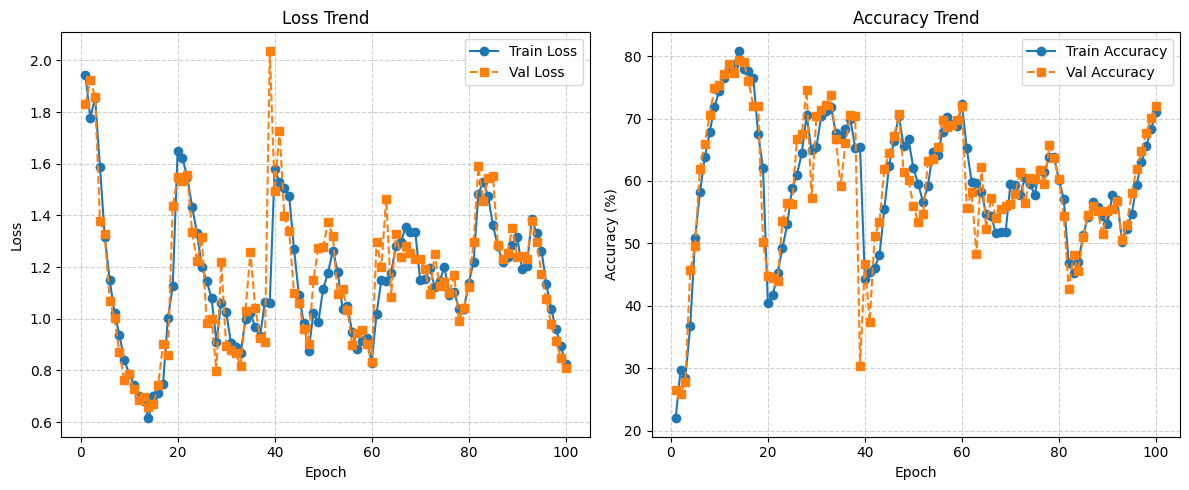

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, 'o-', label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, 's--', label='Val Loss')
plt.title('Loss Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accs, 'o-', label='Train Accuracy')
plt.plot(range(1, epochs+1), val_accs, 's--', label='Val Accuracy')
plt.title('Accuracy Trend')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()